In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")
%matplotlib inline

print("="*70)
print("STEP 1: DATA LOADING AND INITIAL EXPLORATION")
print("="*70)
df = pd.read_csv('COPD_100k_dataset.csv')

STEP 1: DATA LOADING AND INITIAL EXPLORATION


In [5]:
# Display basic information
print("\n1. Dataset Shape:", df.shape)
print("   - Rows:", df.shape[0])
print("   - Columns:", df.shape[1])

print("\n2. First 5 rows of the dataset:")
print(df.head())

print("\n3. Dataset Information:")
print(df.info())

print("\n4. Basic Statistics:")
print(df.describe())

print("\n5. Missing Values Check:")
print(df.isnull().sum())

print("\n6. Data Types:")
print(df.dtypes)


1. Dataset Shape: (100000, 13)
   - Rows: 100000
   - Columns: 13

2. First 5 rows of the dataset:
   Age   BMI  Smoking_Pack_Years  FEV1_FVC_Ratio  FEV1_Percent_Predicted  \
0   45  28.1                15.9           0.674                      69   
1   42  20.3                 9.7           0.675                      80   
2   69  23.0                10.4           0.832                      89   
3   74  23.3                 7.3           0.768                      80   
4   62  27.2                13.8           0.671                      67   

   Oxygen_Saturation_SpO2  mMRC_Scale  Exacerbations_History  \
0                    92.9           4                      3   
1                    98.6           3                      3   
2                    98.5           2                      5   
3                    90.8           3                      4   
4                    89.9           0                      0   

   Occupational_Exposure  Eosinophil_Count  DLCO_Level  AA


STEP 2: TARGET VARIABLE ANALYSIS

Original COPD_Diagnosis range: 0.00 to 1.00
Binary conversion threshold: 0.5
Class distribution after binary conversion:
COPD_Diagnosis_Binary
1    82050
0    17950
Name: count, dtype: int64
Percentage: 
COPD_Diagnosis_Binary
1    82.05
0    17.95
Name: proportion, dtype: float64


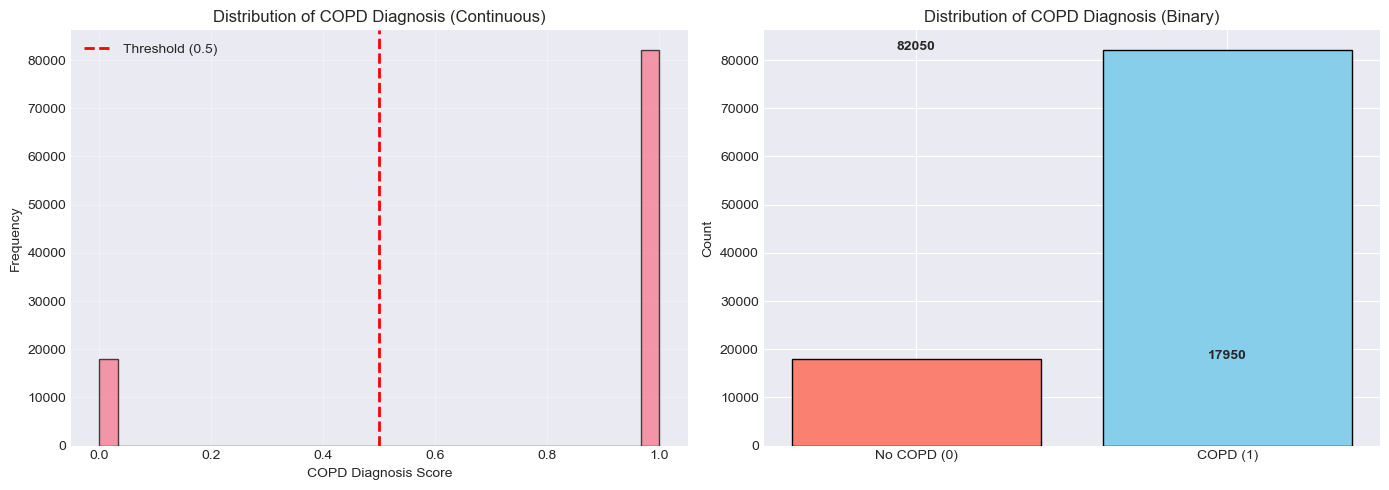

In [7]:
# ============================================================================
# STEP 2: TARGET VARIABLE ANALYSIS
# ============================================================================

print("\n" + "="*70)
print("STEP 2: TARGET VARIABLE ANALYSIS")
print("="*70)

# Since COPD_Diagnosis appears to be continuous between 0 and 1,
# we'll convert it to binary for classification (threshold at 0.5)
df['COPD_Diagnosis_Binary'] = (df['COPD_Diagnosis'] >= 0.5).astype(int)

print(f"\nOriginal COPD_Diagnosis range: {df['COPD_Diagnosis'].min():.2f} to {df['COPD_Diagnosis'].max():.2f}")
print(f"Binary conversion threshold: 0.5")
print(f"Class distribution after binary conversion:")
print(df['COPD_Diagnosis_Binary'].value_counts())
print(f"Percentage: \n{df['COPD_Diagnosis_Binary'].value_counts(normalize=True) * 100}")

# Visualize the target variable
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Histogram of original continuous target
axes[0].hist(df['COPD_Diagnosis'], bins=30, edgecolor='black', alpha=0.7)
axes[0].axvline(x=0.5, color='red', linestyle='--', linewidth=2, label='Threshold (0.5)')
axes[0].set_xlabel('COPD Diagnosis Score')
axes[0].set_ylabel('Frequency')
axes[0].set_title('Distribution of COPD Diagnosis (Continuous)')
axes[0].legend()
axes[0].grid(True, alpha=0.3)

# Bar plot of binary target
class_counts = df['COPD_Diagnosis_Binary'].value_counts()
axes[1].bar(class_counts.index, class_counts.values, color=['skyblue', 'salmon'], edgecolor='black')
axes[1].set_xticks([0, 1])
axes[1].set_xticklabels(['No COPD (0)', 'COPD (1)'])
axes[1].set_ylabel('Count')
axes[1].set_title('Distribution of COPD Diagnosis (Binary)')
for i, v in enumerate(class_counts.values):
    axes[1].text(i, v + 10, str(v), ha='center', fontweight='bold')

plt.tight_layout()
plt.show()


STEP 3: EXPLORATORY DATA ANALYSIS (EDA)

Number of features: 12
Feature names: ['Age', 'BMI', 'Smoking_Pack_Years', 'FEV1_FVC_Ratio', 'FEV1_Percent_Predicted', 'Oxygen_Saturation_SpO2', 'mMRC_Scale', 'Exacerbations_History', 'Occupational_Exposure', 'Eosinophil_Count', 'DLCO_Level', 'AAT_Level']

3.1 Statistical Summary of Features:
                Age            BMI  Smoking_Pack_Years  FEV1_FVC_Ratio  \
count  100000.00000  100000.000000       100000.000000   100000.000000   
mean       62.07936      24.004575           24.470192        0.699501   
std        12.92520       3.947435           22.958166        0.118118   
min        40.00000      15.000000            0.000000        0.350000   
25%        51.00000      21.300000            7.200000        0.617000   
50%        62.00000      24.000000           17.200000        0.699000   
75%        73.00000      26.700000           34.400000        0.782000   
max        84.00000      35.000000          100.000000        0.950000  

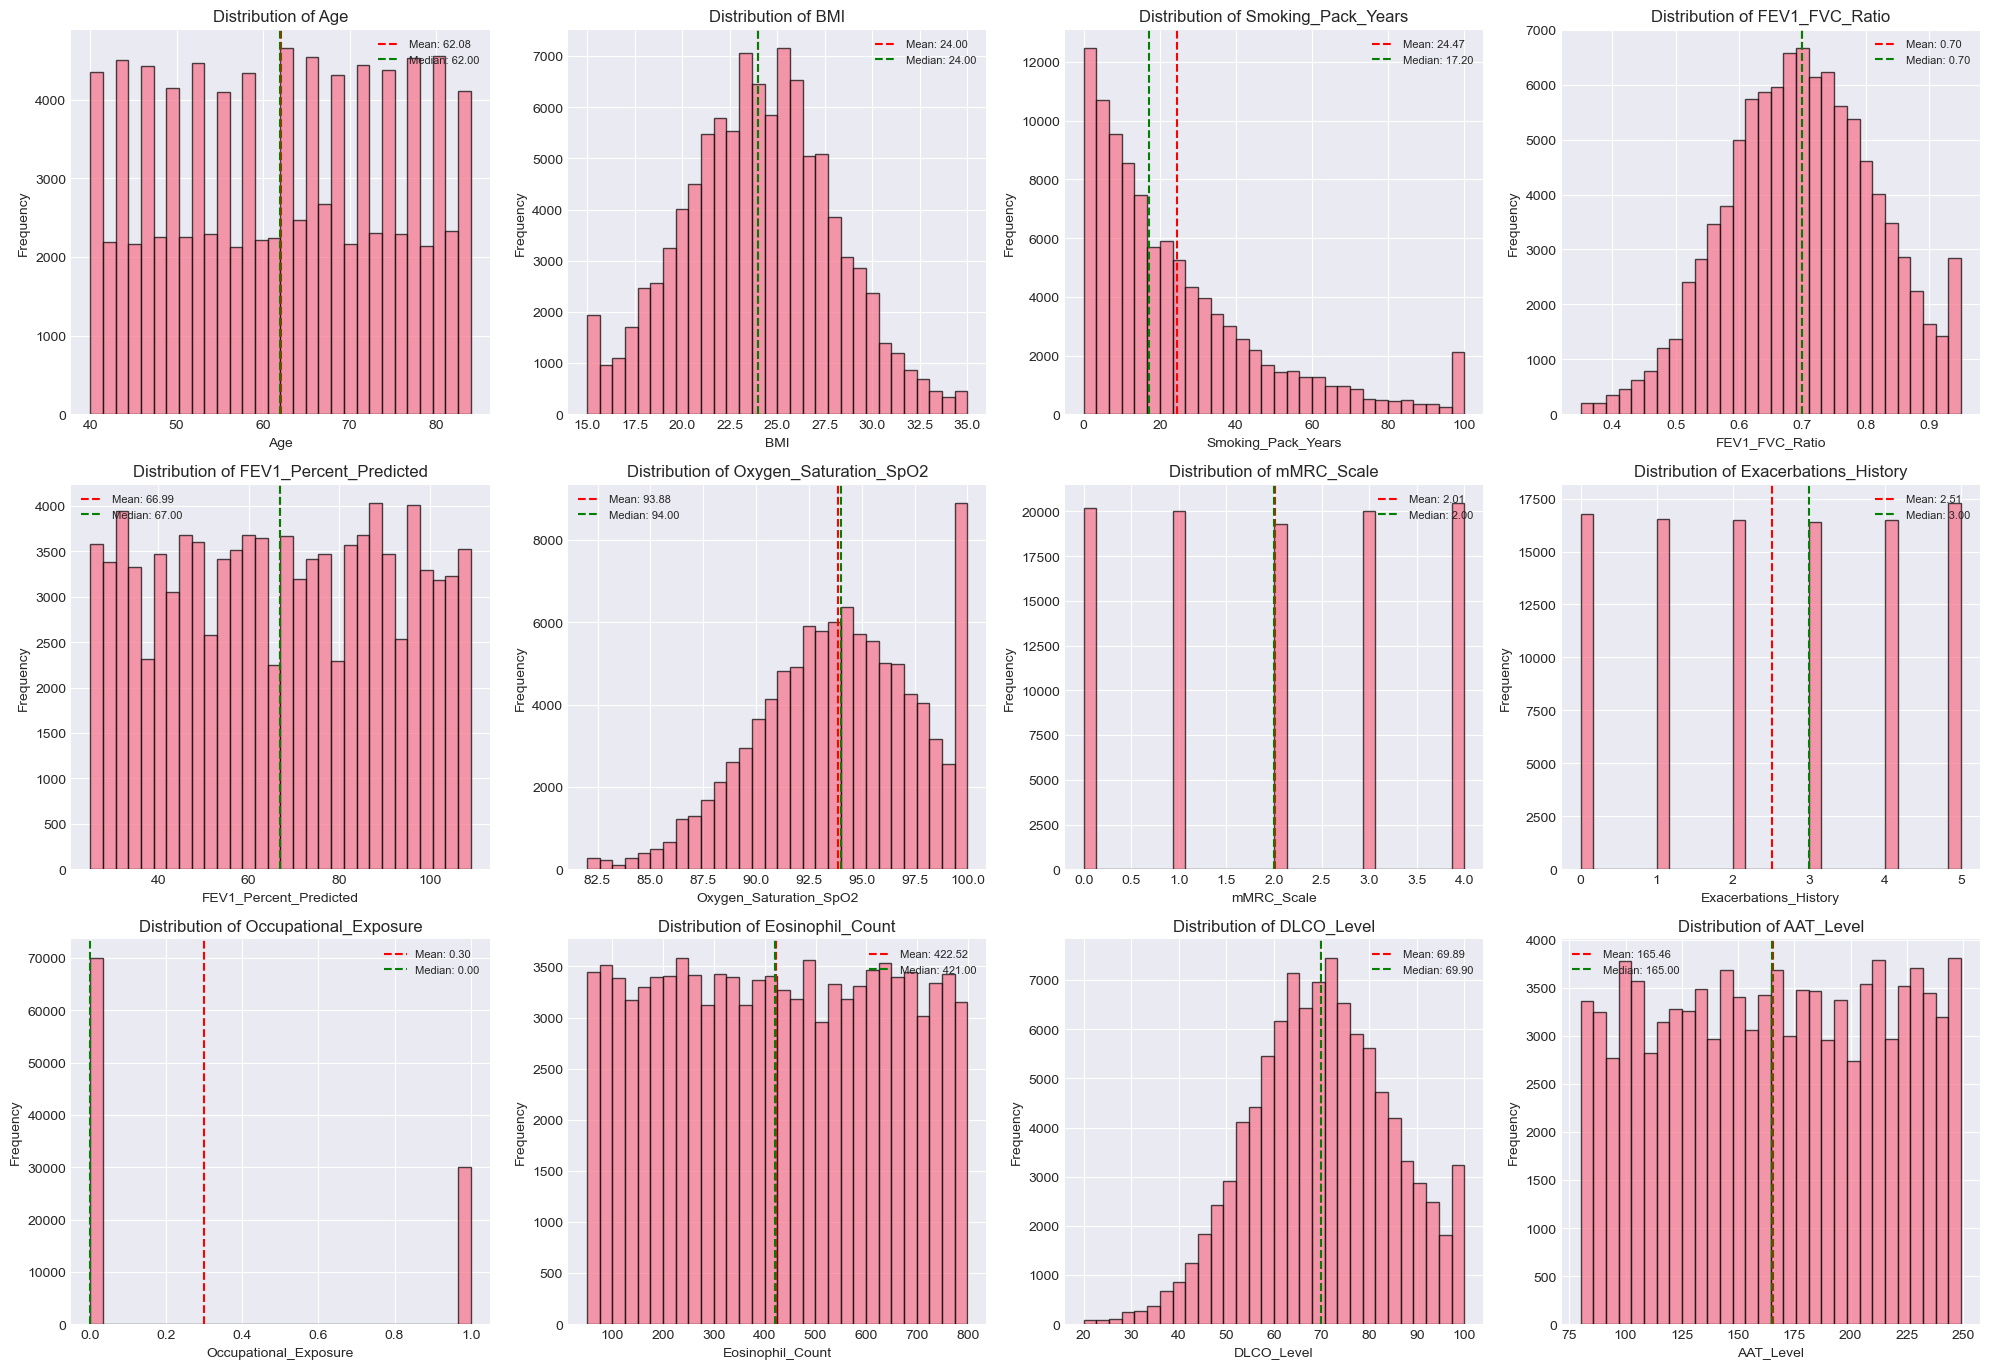

In [8]:
# ============================================================================
# STEP 3: EXPLORATORY DATA ANALYSIS (EDA) - NUMERICAL FEATURES
# ============================================================================

print("\n" + "="*70)
print("STEP 3: EXPLORATORY DATA ANALYSIS (EDA)")
print("="*70)

# Separate features and target
features = df.drop(['COPD_Diagnosis', 'COPD_Diagnosis_Binary'], axis=1)
target = df['COPD_Diagnosis_Binary']

print(f"\nNumber of features: {len(features.columns)}")
print("Feature names:", list(features.columns))

# 3.1 Statistical summary of features
print("\n3.1 Statistical Summary of Features:")
print(features.describe())

# 3.2 Distribution of numerical features
print("\n3.2 Visualizing Feature Distributions...")

# Select numerical features (excluding binary ones if any)
numerical_features = features.select_dtypes(include=[np.number]).columns.tolist()
print(f"Number of numerical features: {len(numerical_features)}")

# Create distribution plots for all numerical features
fig, axes = plt.subplots(4, 4, figsize=(20, 18))
axes = axes.ravel()

for i, col in enumerate(numerical_features[:16]):  # Plot first 16 features
    axes[i].hist(features[col], bins=30, edgecolor='black', alpha=0.7)
    axes[i].set_title(f'Distribution of {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Frequency')
    
    # Add vertical lines for mean and median
    axes[i].axvline(features[col].mean(), color='red', linestyle='--', linewidth=1.5, label=f'Mean: {features[col].mean():.2f}')
    axes[i].axvline(features[col].median(), color='green', linestyle='--', linewidth=1.5, label=f'Median: {features[col].median():.2f}')
    axes[i].legend(fontsize=8)

# Hide unused subplots
for i in range(len(numerical_features[:16]), 16):
    axes[i].set_visible(False)

plt.tight_layout()
plt.show()


STEP 4: OUTLIER DETECTION AND ANALYSIS

4.1 Outlier Detection using IQR Method:
               Feature  Outliers Count Outlier % Lower Bound Upper Bound
                   BMI             343     0.34%       13.20       34.80
    Smoking_Pack_Years            4720     4.72%      -33.60       75.20
        FEV1_FVC_Ratio             200     0.20%        0.37        1.03
Oxygen_Saturation_SpO2             490     0.49%       83.20      104.80
            DLCO_Level             363     0.36%       29.45      110.65

4.2 Visualizing Outliers with Box Plots...


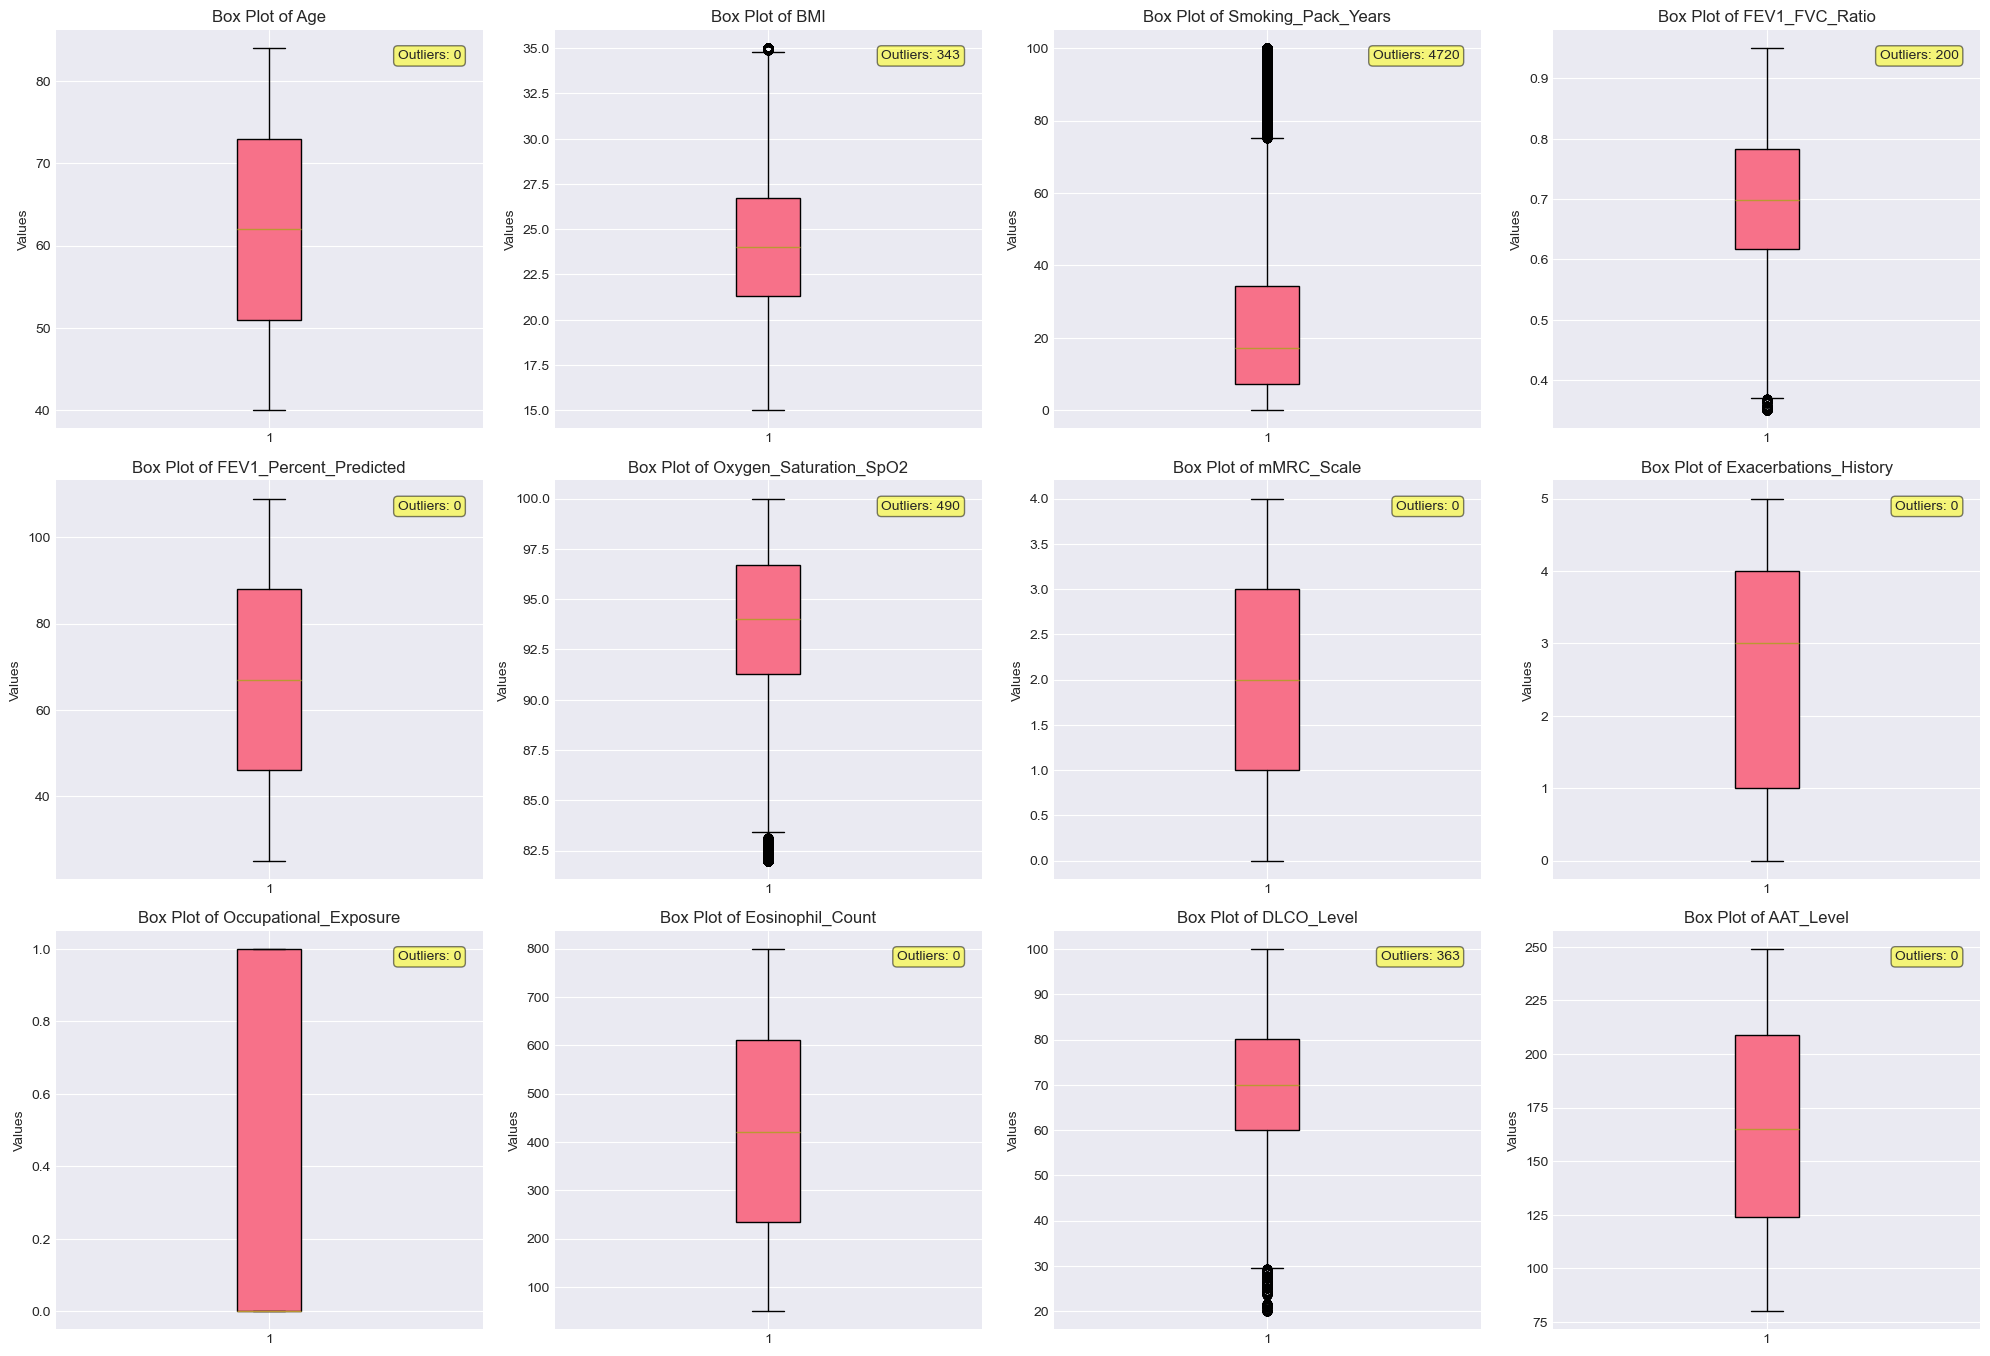

In [9]:
# ============================================================================
# STEP 4: OUTLIER DETECTION AND ANALYSIS
# ============================================================================

print("\n" + "="*70)
print("STEP 4: OUTLIER DETECTION AND ANALYSIS")
print("="*70)

# 4.1 Identify outliers using IQR method
print("\n4.1 Outlier Detection using IQR Method:")

outlier_info = []
for col in numerical_features:
    Q1 = features[col].quantile(0.25)
    Q3 = features[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    outliers = features[(features[col] < lower_bound) | (features[col] > upper_bound)]
    outlier_percentage = (len(outliers) / len(features)) * 100
    
    if outlier_percentage > 0:
        outlier_info.append({
            'Feature': col,
            'Outliers Count': len(outliers),
            'Outlier %': f'{outlier_percentage:.2f}%',
            'Lower Bound': f'{lower_bound:.2f}',
            'Upper Bound': f'{upper_bound:.2f}'
        })

outlier_df = pd.DataFrame(outlier_info)
print(outlier_df.to_string(index=False))

# 4.2 Visualize outliers using box plots
print("\n4.2 Visualizing Outliers with Box Plots...")

fig, axes = plt.subplots(4, 4, figsize=(20, 18))
axes = axes.ravel()

for i, col in enumerate(numerical_features[:16]):  # Plot first 16 features
    data_to_plot = [features[col].values]
    axes[i].boxplot(data_to_plot, patch_artist=True)
    axes[i].set_title(f'Box Plot of {col}')
    axes[i].set_ylabel('Values')
    
    # Calculate and display outlier count
    Q1 = features[col].quantile(0.25)
    Q3 = features[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = features[(features[col] < lower_bound) | (features[col] > upper_bound)]
    
    axes[i].text(0.95, 0.95, f'Outliers: {len(outliers)}', 
                 transform=axes[i].transAxes, fontsize=10,
                 verticalalignment='top', horizontalalignment='right',
                 bbox=dict(boxstyle='round', facecolor='yellow', alpha=0.5))

# Hide unused subplots
for i in range(len(numerical_features[:16]), 16):
    axes[i].set_visible(False)

plt.tight_layout()
plt.show()



STEP 5: CORRELATION ANALYSIS

5.1 Correlation Matrix Analysis...


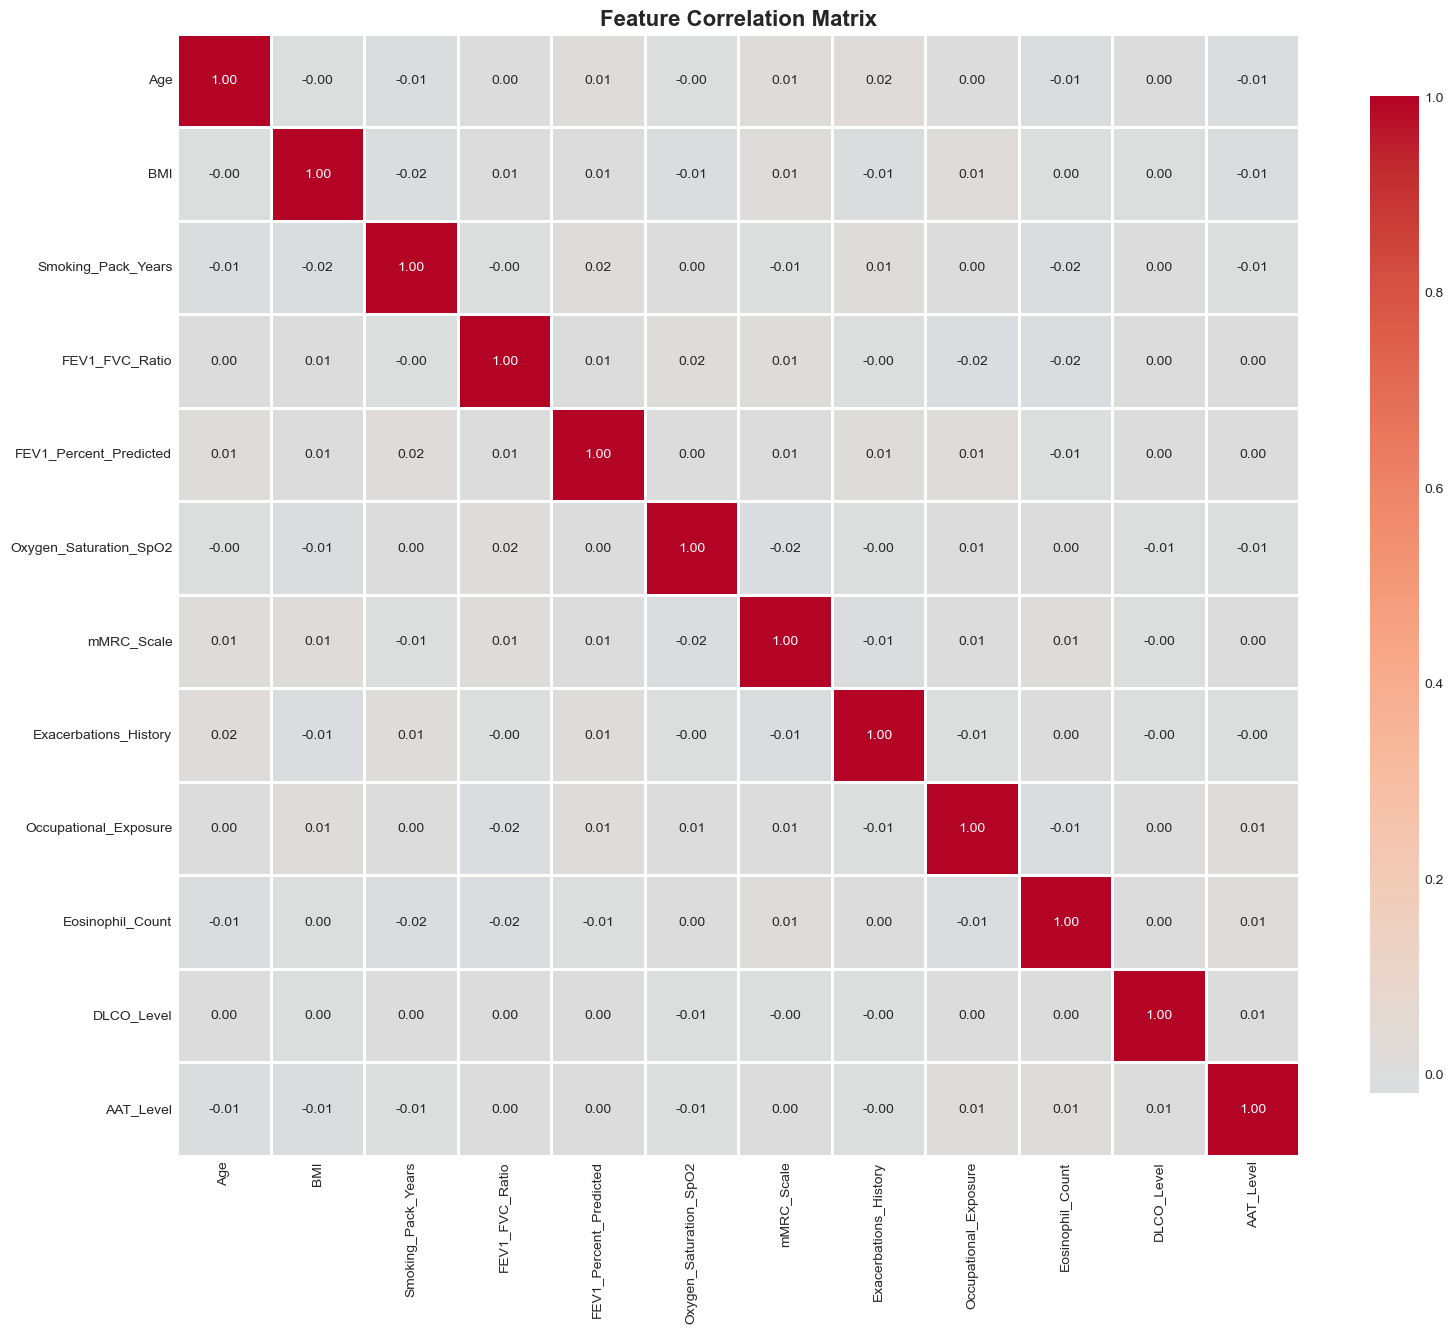


5.2 Features Most Correlated with Target:

Top 10 positive correlations with target:
Smoking_Pack_Years        0.288781
mMRC_Scale                0.131723
FEV1_Percent_Predicted    0.009058
Occupational_Exposure     0.004776
Exacerbations_History     0.002028
Age                      -0.003174
Eosinophil_Count         -0.004174
BMI                      -0.005314
AAT_Level                -0.033137
DLCO_Level               -0.105853
Name: COPD_Diagnosis_Binary, dtype: float64

Top 10 negative correlations with target:
FEV1_Percent_Predicted    0.009058
Occupational_Exposure     0.004776
Exacerbations_History     0.002028
Age                      -0.003174
Eosinophil_Count         -0.004174
BMI                      -0.005314
AAT_Level                -0.033137
DLCO_Level               -0.105853
Oxygen_Saturation_SpO2   -0.323426
FEV1_FVC_Ratio           -0.456736
Name: COPD_Diagnosis_Binary, dtype: float64


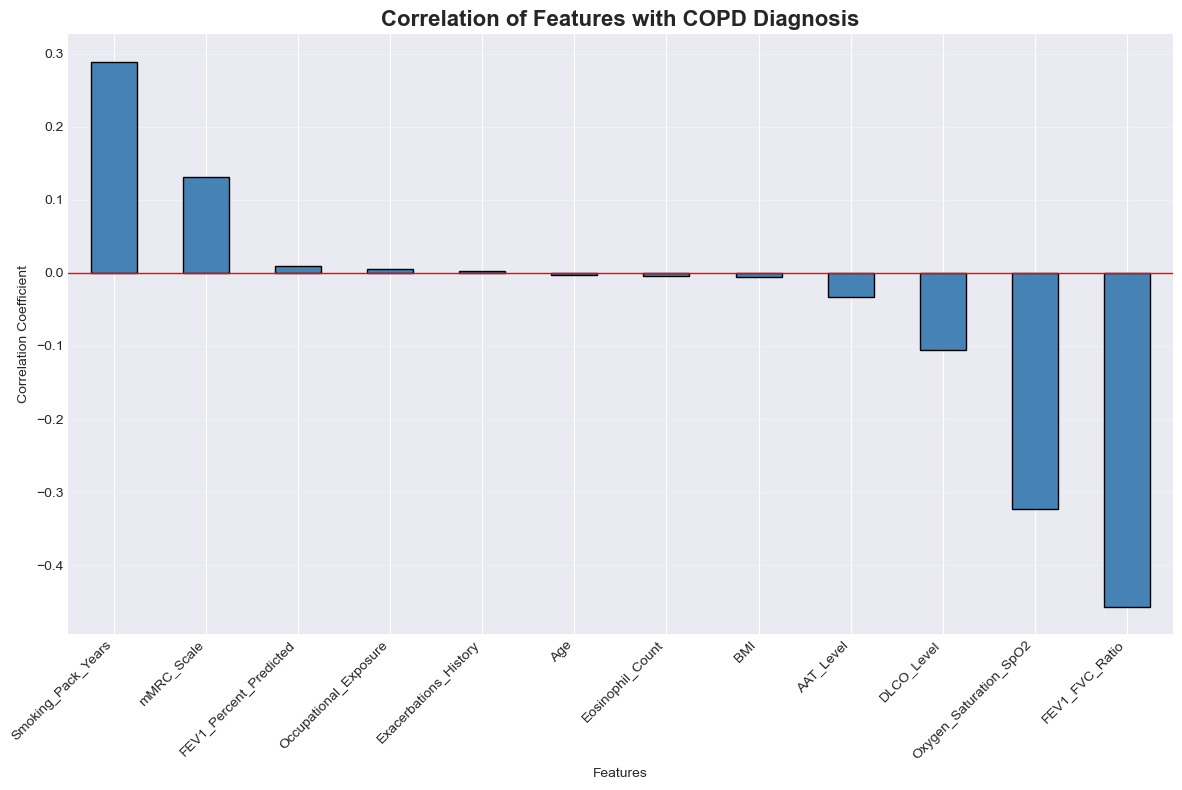

In [10]:
# ============================================================================
# STEP 5: CORRELATION ANALYSIS
# ============================================================================

print("\n" + "="*70)
print("STEP 5: CORRELATION ANALYSIS")
print("="*70)

# 5.1 Correlation matrix
print("\n5.1 Correlation Matrix Analysis...")

# Calculate correlation matrix
correlation_matrix = features.corr()

# Plot heatmap
plt.figure(figsize=(16, 14))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', 
            center=0, square=True, linewidths=1, cbar_kws={"shrink": 0.8})
plt.title('Feature Correlation Matrix', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

# 5.2 Top correlations with target
print("\n5.2 Features Most Correlated with Target:")

# Add target to correlation calculation
features_with_target = features.copy()
features_with_target['COPD_Diagnosis_Binary'] = target

# Calculate correlations with target
corr_with_target = features_with_target.corr()['COPD_Diagnosis_Binary'].sort_values(ascending=False)

# Remove target itself
corr_with_target = corr_with_target.drop('COPD_Diagnosis_Binary')

print("\nTop 10 positive correlations with target:")
print(corr_with_target.head(10))

print("\nTop 10 negative correlations with target:")
print(corr_with_target.tail(10))

# Plot correlations with target
plt.figure(figsize=(12, 8))
corr_with_target.plot(kind='bar', color='steelblue', edgecolor='black')
plt.axhline(y=0, color='red', linestyle='-', linewidth=1)
plt.title('Correlation of Features with COPD Diagnosis', fontsize=16, fontweight='bold')
plt.xlabel('Features')
plt.ylabel('Correlation Coefficient')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()


In [11]:
# ============================================================================
# STEP 6: FEATURE ENGINEERING AND DATA PREPROCESSING
# ============================================================================

print("\n" + "="*70)
print("STEP 6: DATA PREPROCESSING")
print("="*70)

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, RobustScaler
from sklearn.impute import SimpleImputer

# 6.1 Handle missing values (if any)
print("\n6.1 Handling Missing Values...")
print(f"Missing values before imputation: {features.isnull().sum().sum()}")

# Initialize imputer (using median strategy for robustness to outliers)
imputer = SimpleImputer(strategy='median')
features_imputed = pd.DataFrame(imputer.fit_transform(features), columns=features.columns)

print(f"Missing values after imputation: {features_imputed.isnull().sum().sum()}")

# 6.2 Handle outliers using Robust Scaling
print("\n6.2 Handling Outliers with Robust Scaling...")

# RobustScaler is less affected by outliers than StandardScaler
scaler = RobustScaler()
features_scaled = pd.DataFrame(scaler.fit_transform(features_imputed), columns=features.columns)

print("Scaling complete. Sample of scaled features:")
print(features_scaled.head())

# 6.3 Train-test split
print("\n6.3 Splitting Data into Train and Test Sets...")

X = features_scaled
y = target

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print(f"Training set size: {X_train.shape}")
print(f"Test set size: {X_test.shape}")
print(f"Training target distribution:\n{y_train.value_counts(normalize=True)}")
print(f"Test target distribution:\n{y_test.value_counts(normalize=True)}")


STEP 6: DATA PREPROCESSING

6.1 Handling Missing Values...
Missing values before imputation: 0
Missing values after imputation: 0

6.2 Handling Outliers with Robust Scaling...
Scaling complete. Sample of scaled features:
        Age       BMI  Smoking_Pack_Years  FEV1_FVC_Ratio  \
0 -0.772727  0.759259           -0.047794       -0.151515   
1 -0.909091 -0.685185           -0.275735       -0.145455   
2  0.318182 -0.185185           -0.250000        0.806061   
3  0.545455 -0.129630           -0.363971        0.418182   
4  0.000000  0.592593           -0.125000       -0.169697   

   FEV1_Percent_Predicted  Oxygen_Saturation_SpO2  mMRC_Scale  \
0                0.047619               -0.203704         1.0   
1                0.309524                0.851852         0.5   
2                0.523810                0.833333         0.0   
3                0.309524               -0.592593         0.5   
4                0.000000               -0.759259        -1.0   

   Exacerbations_His

In [12]:
# ============================================================================
# STEP 7: MODEL TRAINING AND EVALUATION
# ============================================================================

print("\n" + "="*70)
print("STEP 7: MODEL TRAINING AND EVALUATION")
print("="*70)

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    confusion_matrix, classification_report, roc_auc_score, roc_curve
)
from sklearn.model_selection import cross_val_score

# Define models to evaluate
models = {
    'Logistic Regression': LogisticRegression(random_state=42, max_iter=1000),
    'Random Forest': RandomForestClassifier(random_state=42, n_estimators=100),
    'Gradient Boosting': GradientBoostingClassifier(random_state=42, n_estimators=100)
}

# Dictionary to store results
results = {}

# Train and evaluate each model
for model_name, model in models.items():
    print(f"\n{'='*50}")
    print(f"Training {model_name}...")
    print('='*50)
    
    # Train the model
    model.fit(X_train, y_train)
    
    # Make predictions
    y_pred = model.predict(X_test)
    y_pred_proba = model.predict_proba(X_test)[:, 1] if hasattr(model, "predict_proba") else None
    
    # Calculate metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    
    # Store results
    results[model_name] = {
        'model': model,
        'accuracy': accuracy,
        'precision': precision,
        'recall': recall,
        'f1': f1,
        'y_pred': y_pred,
        'y_pred_proba': y_pred_proba
    }
    
    # Print metrics
    print(f"Accuracy:  {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall:    {recall:.4f}")
    print(f"F1-Score:  {f1:.4f}")
    
    # Cross-validation scores
    cv_scores = cross_val_score(model, X, y, cv=5, scoring='accuracy')
    print(f"Cross-validation Accuracy: {cv_scores.mean():.4f} (+/- {cv_scores.std() * 2:.4f})")
    
    # Classification report
    print(f"\nClassification Report for {model_name}:")
    print(classification_report(y_test, y_pred, target_names=['No COPD', 'COPD']))



STEP 7: MODEL TRAINING AND EVALUATION

Training Logistic Regression...
Accuracy:  0.9700
Precision: 0.9805
Recall:    0.9830
F1-Score:  0.9817
Cross-validation Accuracy: 0.9702 (+/- 0.0030)

Classification Report for Logistic Regression:
              precision    recall  f1-score   support

     No COPD       0.92      0.91      0.92      3590
        COPD       0.98      0.98      0.98     16410

    accuracy                           0.97     20000
   macro avg       0.95      0.95      0.95     20000
weighted avg       0.97      0.97      0.97     20000


Training Random Forest...
Accuracy:  0.9780
Precision: 0.9806
Recall:    0.9928
F1-Score:  0.9867
Cross-validation Accuracy: 0.9776 (+/- 0.0031)

Classification Report for Random Forest:
              precision    recall  f1-score   support

     No COPD       0.97      0.91      0.94      3590
        COPD       0.98      0.99      0.99     16410

    accuracy                           0.98     20000
   macro avg       0.97     


STEP 8: MODEL COMPARISON

Model Performance Comparison:
              Model  Accuracy  Precision   Recall  F1-Score
Logistic Regression    0.9700   0.980489 0.982998  0.981742
      Random Forest    0.9780   0.980619 0.992809  0.986676
  Gradient Boosting    0.9742   0.974561 0.994516  0.984437


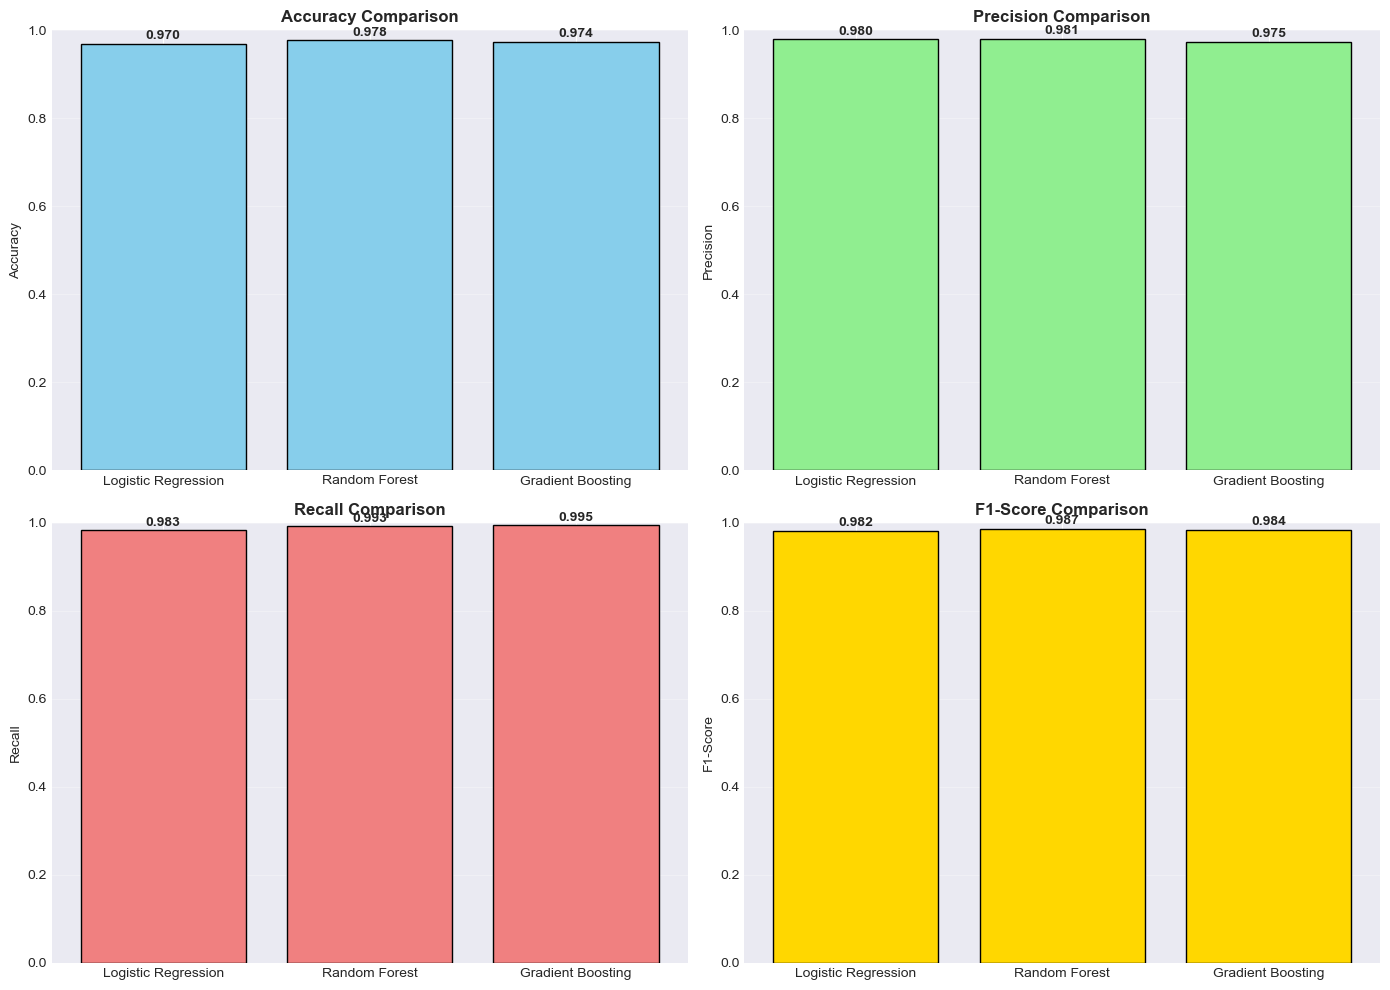


8.3 Confusion Matrices:


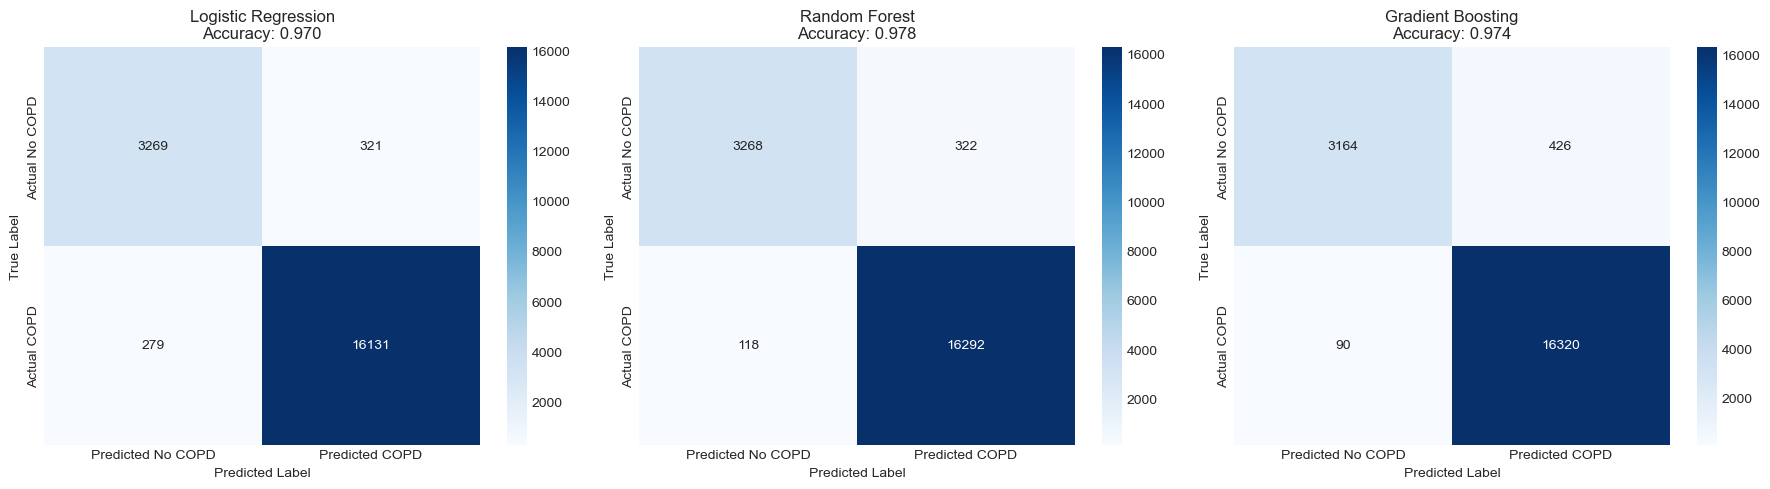


8.4 ROC Curves:


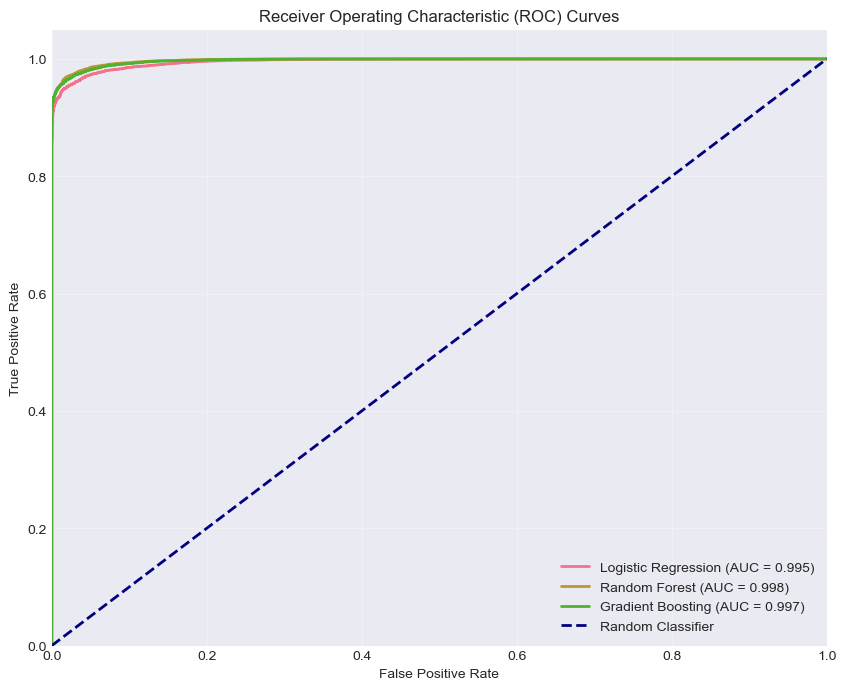

In [13]:
# ============================================================================
# STEP 8: MODEL COMPARISON AND VISUALIZATION
# ============================================================================

print("\n" + "="*70)
print("STEP 8: MODEL COMPARISON")
print("="*70)

# 8.1 Create comparison DataFrame
comparison_df = pd.DataFrame({
    'Model': list(results.keys()),
    'Accuracy': [results[m]['accuracy'] for m in results],
    'Precision': [results[m]['precision'] for m in results],
    'Recall': [results[m]['recall'] for m in results],
    'F1-Score': [results[m]['f1'] for m in results]
})

print("\nModel Performance Comparison:")
print(comparison_df.to_string(index=False))

# 8.2 Visualize model comparison
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
axes = axes.ravel()

metrics = ['Accuracy', 'Precision', 'Recall', 'F1-Score']
colors = ['skyblue', 'lightgreen', 'lightcoral', 'gold']

for idx, metric in enumerate(metrics):
    axes[idx].bar(comparison_df['Model'], comparison_df[metric], color=colors[idx], edgecolor='black')
    axes[idx].set_title(f'{metric} Comparison', fontweight='bold')
    axes[idx].set_ylabel(metric)
    axes[idx].set_ylim([0, 1])
    axes[idx].grid(axis='y', alpha=0.3)
    
    # Add value labels on bars
    for i, v in enumerate(comparison_df[metric]):
        axes[idx].text(i, v + 0.01, f'{v:.3f}', ha='center', fontweight='bold')

plt.tight_layout()
plt.show()

# 8.3 Confusion matrices for all models
print("\n8.3 Confusion Matrices:")

fig, axes = plt.subplots(1, 3, figsize=(18, 5))

for idx, (model_name, result) in enumerate(results.items()):
    cm = confusion_matrix(y_test, result['y_pred'])
    
    # Plot confusion matrix
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=axes[idx],
                xticklabels=['Predicted No COPD', 'Predicted COPD'],
                yticklabels=['Actual No COPD', 'Actual COPD'])
    axes[idx].set_title(f'{model_name}\nAccuracy: {result["accuracy"]:.3f}')
    axes[idx].set_ylabel('True Label')
    axes[idx].set_xlabel('Predicted Label')

plt.tight_layout()
plt.show()

# 8.4 ROC Curves for models that support probability predictions
print("\n8.4 ROC Curves:")

plt.figure(figsize=(10, 8))
for model_name, result in results.items():
    if result['y_pred_proba'] is not None:
        fpr, tpr, _ = roc_curve(y_test, result['y_pred_proba'])
        roc_auc = roc_auc_score(y_test, result['y_pred_proba'])
        plt.plot(fpr, tpr, lw=2, label=f'{model_name} (AUC = {roc_auc:.3f})')

# Plot diagonal line (random classifier)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random Classifier')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curves')
plt.legend(loc="lower right")
plt.grid(alpha=0.3)
plt.show()


STEP 9: SELECTING THE BEST MODEL

Best Model: Random Forest
F1-Score: 0.9867
Accuracy: 0.9780
Precision: 0.9806
Recall: 0.9928

9.1 Feature Importance Analysis for Random Forest:

Top 10 Most Important Features:
               Feature  Importance
        FEV1_FVC_Ratio    0.366087
    Smoking_Pack_Years    0.216467
Oxygen_Saturation_SpO2    0.209491
            DLCO_Level    0.049045
            mMRC_Scale    0.038054
             AAT_Level    0.026645
      Eosinophil_Count    0.022574
                   BMI    0.020945
FEV1_Percent_Predicted    0.020050
                   Age    0.018098


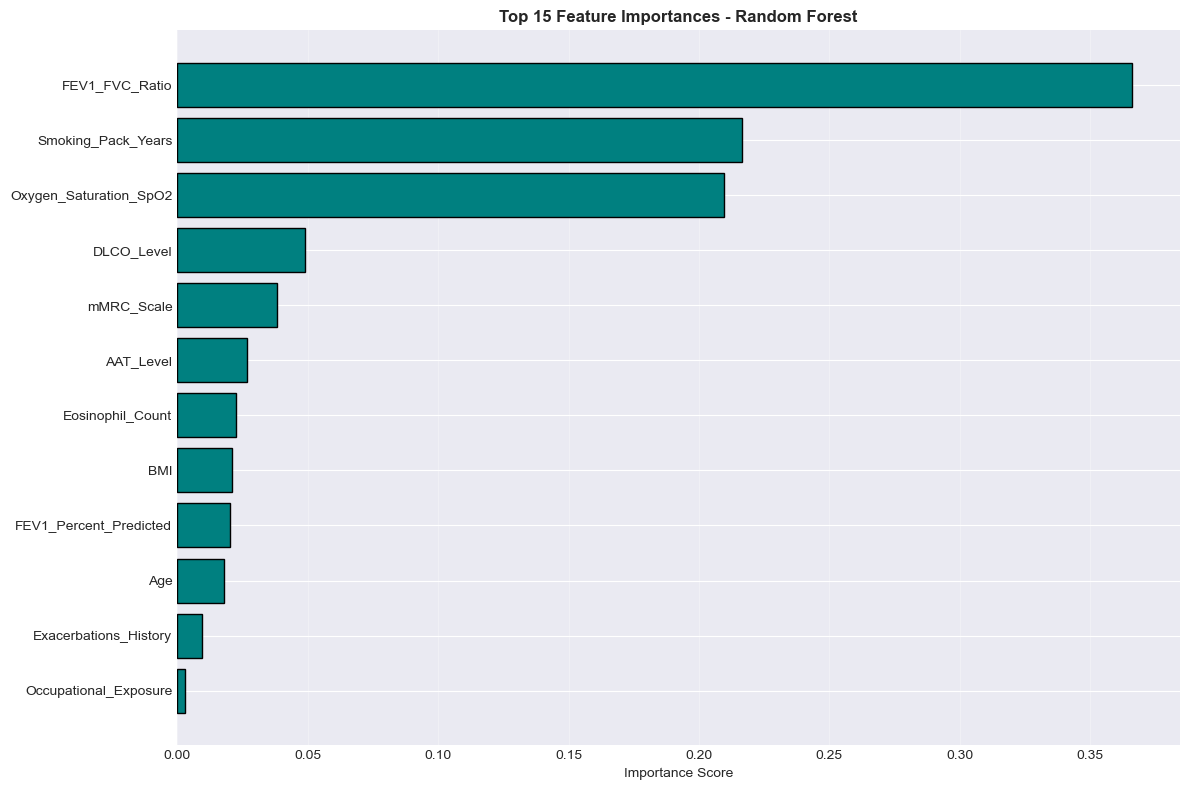


9.2 Final Evaluation on Test Set:
              precision    recall  f1-score   support

     No COPD       0.97      0.91      0.94      3590
        COPD       0.98      0.99      0.99     16410

    accuracy                           0.98     20000
   macro avg       0.97      0.95      0.96     20000
weighted avg       0.98      0.98      0.98     20000



In [14]:
# ============================================================================
# STEP 9: SELECT BEST MODEL AND FEATURE IMPORTANCE
# ============================================================================

print("\n" + "="*70)
print("STEP 9: SELECTING THE BEST MODEL")
print("="*70)

# Find best model based on F1-Score (balance of precision and recall)
best_model_name = max(results.items(), key=lambda x: x[1]['f1'])[0]
best_model = results[best_model_name]['model']

print(f"\nBest Model: {best_model_name}")
print(f"F1-Score: {results[best_model_name]['f1']:.4f}")
print(f"Accuracy: {results[best_model_name]['accuracy']:.4f}")
print(f"Precision: {results[best_model_name]['precision']:.4f}")
print(f"Recall: {results[best_model_name]['recall']:.4f}")

# 9.1 Feature importance for tree-based models
if hasattr(best_model, 'feature_importances_'):
    print(f"\n9.1 Feature Importance Analysis for {best_model_name}:")
    
    # Get feature importances
    importances = best_model.feature_importances_
    feature_importance_df = pd.DataFrame({
        'Feature': X.columns,
        'Importance': importances
    }).sort_values('Importance', ascending=False)
    
    print("\nTop 10 Most Important Features:")
    print(feature_importance_df.head(10).to_string(index=False))
    
    # Plot feature importance
    plt.figure(figsize=(12, 8))
    top_features = feature_importance_df.head(15)
    plt.barh(range(len(top_features)), top_features['Importance'], color='teal', edgecolor='black')
    plt.yticks(range(len(top_features)), top_features['Feature'])
    plt.xlabel('Importance Score')
    plt.title(f'Top 15 Feature Importances - {best_model_name}', fontweight='bold')
    plt.gca().invert_yaxis()  # Highest importance at top
    plt.grid(axis='x', alpha=0.3)
    plt.tight_layout()
    plt.show()

# 9.2 Final evaluation on test set
print("\n9.2 Final Evaluation on Test Set:")
y_pred_final = best_model.predict(X_test)
print(classification_report(y_test, y_pred_final, target_names=['No COPD', 'COPD']))


In [15]:
# ============================================================================
# STEP 10: HANDLING CLASS IMBALANCE (IF NEEDED)
# ============================================================================

print("\n" + "="*70)
print("STEP 10: ADDRESSING CLASS IMBALANCE")
print("="*70)

# Check class imbalance
class_counts = y.value_counts()
imbalance_ratio = class_counts[0] / class_counts[1]
print(f"Class 0 (No COPD): {class_counts[0]} samples")
print(f"Class 1 (COPD): {class_counts[1]} samples")
print(f"Imbalance Ratio (Class 0 / Class 1): {imbalance_ratio:.2f}")

if imbalance_ratio > 1.5:
    print("\nNote: Moderate class imbalance detected. Consider techniques like:")
    print("1. SMOTE (Synthetic Minority Oversampling)")
    print("2. Class weighting in models")
    print("3. Different evaluation metrics (F1-score, ROC-AUC)")
    
    # Demonstrate class weighting with Random Forest
    print("\nTraining Random Forest with class weighting...")
    rf_balanced = RandomForestClassifier(
        random_state=42, 
        n_estimators=100,
        class_weight='balanced'  # Automatically adjust weights inversely proportional to class frequencies
    )
    
    rf_balanced.fit(X_train, y_train)
    y_pred_balanced = rf_balanced.predict(X_test)
    
    print(f"Balanced Model Accuracy: {accuracy_score(y_test, y_pred_balanced):.4f}")
    print(f"Balanced Model F1-Score: {f1_score(y_test, y_pred_balanced):.4f}")
    print(f"Balanced Model Recall: {recall_score(y_test, y_pred_balanced):.4f}")
    
    print("\nClassification Report (with class weighting):")
    print(classification_report(y_test, y_pred_balanced, target_names=['No COPD', 'COPD']))
else:
    print("\nClass imbalance is minimal. No special handling required.")


STEP 10: ADDRESSING CLASS IMBALANCE
Class 0 (No COPD): 17950 samples
Class 1 (COPD): 82050 samples
Imbalance Ratio (Class 0 / Class 1): 0.22

Class imbalance is minimal. No special handling required.


In [16]:
# ============================================================================
# STEP 11: SUMMARY AND RECOMMENDATIONS
# ============================================================================

print("\n" + "="*70)
print("STEP 11: SUMMARY AND RECOMMENDATIONS")
print("="*70)

print("\n1. DATA SUMMARY:")
print(f"   - Total samples: {df.shape[0]}")
print(f"   - Features: {df.shape[1] - 2} (excluding target variables)")
print(f"   - Binary class distribution: {df['COPD_Diagnosis_Binary'].value_counts().to_dict()}")

print("\n2. OUTLIER HANDLING STRATEGY:")
print("   - Used RobustScaler instead of StandardScaler")
print("   - RobustScaler uses median and IQR, making it less sensitive to outliers")
print("   - Tree-based models (Random Forest, Gradient Boosting) are inherently robust to outliers")

print("\n3. MODEL PERFORMANCE SUMMARY:")
for model_name, metrics in results.items():
    print(f"   {model_name}:")
    print(f"     - Accuracy:  {metrics['accuracy']:.4f}")
    print(f"     - Precision: {metrics['precision']:.4f}")
    print(f"     - Recall:    {metrics['recall']:.4f}")
    print(f"     - F1-Score:  {metrics['f1']:.4f}")

print("\n4. RECOMMENDATIONS FOR DEPLOYMENT:")
print("   a) Best Model: Based on F1-score, {best_model_name} is recommended")
print("   b) Key Metrics to Monitor:")
print("      - Recall: Important to minimize false negatives (missed COPD cases)")
print("      - Precision: Important to minimize false positives (unnecessary treatments)")
print("   c) Feature Importance: Focus on top predictive features for interpretation")
print("   d) Regular Updates: Retrain model periodically with new data")
print("   e) Clinical Validation: Always validate predictions with medical experts")

print("\n" + "="*70)
print("ANALYSIS COMPLETE!")
print("="*70)


STEP 11: SUMMARY AND RECOMMENDATIONS

1. DATA SUMMARY:
   - Total samples: 100000
   - Features: 12 (excluding target variables)
   - Binary class distribution: {1: 82050, 0: 17950}

2. OUTLIER HANDLING STRATEGY:
   - Used RobustScaler instead of StandardScaler
   - RobustScaler uses median and IQR, making it less sensitive to outliers
   - Tree-based models (Random Forest, Gradient Boosting) are inherently robust to outliers

3. MODEL PERFORMANCE SUMMARY:
   Logistic Regression:
     - Accuracy:  0.9700
     - Precision: 0.9805
     - Recall:    0.9830
     - F1-Score:  0.9817
   Random Forest:
     - Accuracy:  0.9780
     - Precision: 0.9806
     - Recall:    0.9928
     - F1-Score:  0.9867
   Gradient Boosting:
     - Accuracy:  0.9742
     - Precision: 0.9746
     - Recall:    0.9945
     - F1-Score:  0.9844

4. RECOMMENDATIONS FOR DEPLOYMENT:
   a) Best Model: Based on F1-score, {best_model_name} is recommended
   b) Key Metrics to Monitor:
      - Recall: Important to minimize 

In [18]:
import joblib

save_bundle = {
    'model': best_model,
    'scaler': scaler,
    'imputer': imputer
}

joblib.dump(save_bundle, 'copd_model_final.pkl')
print("--- Model Saved as 'copd_model_final.pkl' ---")

def get_risk_score(naya_data):

    data_imputed = imputer.transform(naya_data)
    data_scaled = scaler.transform(data_imputed)
    
    risk_score = best_model.predict_proba(data_scaled)[:, 1]
    return risk_score

print(f"Test Sample Probability (0-1): {results[best_model_name]['y_pred_proba'][:5]}")

--- Model Saved as 'copd_model_final.pkl' ---
Test Sample Probability (0-1): [1.   0.33 0.93 0.97 1.  ]
